# Kozeny-Carman equation

\begin{equation}
    K = \dfrac{d_p^2}{180}\dfrac{\theta^3}{(1-\theta)^2} \dfrac{\rho g }{\mu}
\end{equation}

In [1]:
%reset -f

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

#Globals
rho = 1000.  #kg/m3
g   = 9.81   #cm/s2
mu  = 0.001  #Ns/m2
dp  = 4.4E-4 #m

def KozenyCarman(theta):
    return dp**2 * theta**3 * rho * g / (180 * (1-theta)**2 * mu)

def Chen2010(theta):
    perm = 810.0*(theta)**3.1   # Original equation
    perm = perm * 9.869233E-13         # Darcy >> m2
    Kcon = perm * rho * g / mu  # Permeability >> Hydraulic cond.
    return Kcon

def Chen2009(theta):
    perm = 1600.0*(theta)**3.7   # Original equation
    perm = perm * 9.869233E-13         # Darcy >> m2
    Kcon = perm * rho * g / mu  # Permeability >> Hydraulic cond.
    return Kcon

def findTheta(K_expected=1.0E-8):
    
    def minimizer(theta):
        K_init = KozenyCarman(theta)
        return (K_init - K_expected)**2
    
    solution = root(minimizer,0.1)
    print(solution.message + f" >> Porosity = {solution.x}")
    return solution.x

In [51]:
porosity = np.linspace(0.001,0.5,100)
hydrCond = KozenyCarman(porosity)

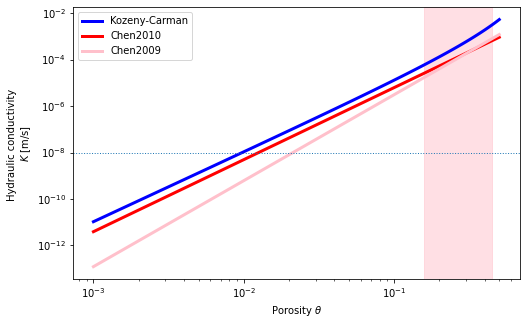

In [59]:
fig,ax = plt.subplots(figsize=(8,5),facecolor="white");

ax.plot(porosity,KozenyCarman(porosity),lw=3,c="blue",label='Kozeny-Carman')
ax.plot(porosity,Chen2010(porosity),lw=3,c="red",label="Chen2010")
ax.plot(porosity,Chen2009(porosity),lw=3,c="pink",label="Chen2009")
ax.axvspan(xmin=10**-0.8,xmax=10**-0.35,color='pink',alpha=0.5)
ax.set(yscale='log',xscale='log')
ax.set_xlabel("Porosity $\\theta$ ")
ax.set_ylabel("Hydraulic conductivity \n$K$ [m/s]")
ax.axhline(y=1.0E-8,lw=1,ls='dotted')
ax.legend()
plt.show()

In [65]:
theta2 = findTheta(1.0E-7)

The solution converged. >> Porosity = [0.02086702]


In [7]:
print("{:.4E} m/s".format(KozenyCarman(0.35)))

1.0707E-03 m/s


In [8]:
from jupypft import attachmentRateCFT

In [28]:
katt,_ = attachmentRateCFT.attachmentRate(dp=1.0E-7,dc=4.4E-4,
    q=0.35E-3,
    theta=0.35,
    visco=0.001,
    rho_f=1000.,
    rho_p=1050.0,
    A=1.0E-20,
    T=298.0,
    alpha=0.0043273861959162,
    debug=True)

Diffusion coeff:  4.3654E-12
Darcy velocity:   3.5000E-04
Pore-water vel:   1.0000E-03
---
Happel parameter: 5.2527E+01
NR number:        2.2727E-04
NPe number:       3.5277E+04
NvW number:       2.4305E+00
NGr number:       3.1211E-06
---
etaD collector:   1.0409E-02
etaI collector:   1.9641E-05
etaG collector:   2.8626E-07
eta0 collector:   1.0429E-02
---
Attach rate   :   1.0000E-04


In [31]:
"{:.6E}".format(0.0043273861959162)

'4.327386E-03'

In [30]:
1.0E-4/katt

1.0000000000000002